In [1]:
import omicverse as ov
from omicverse.utils import mde
import scanpy as sc
import scvelo as scv
ov.utils.ov_plot_set()

In [2]:
adata=sc.read('data/liver_hpc_anno.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 29370 × 18648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [192]:
adata[adata.obs['celltype'].isin(['HPC','GMP','iNP','imNP','mNP','Monocyte','Basophil'])]

View of AnnData object with n_obs × n_vars = 10291 × 18648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

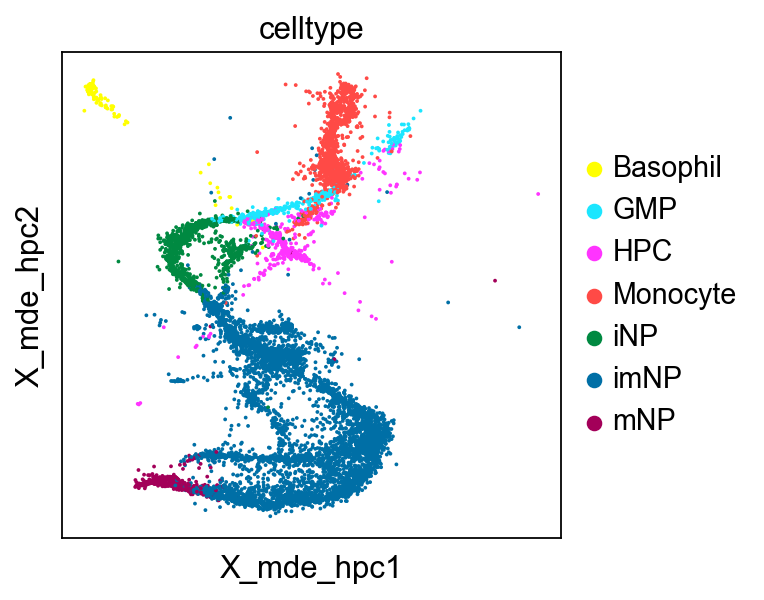

In [193]:
#['HPC','GMP','Erythroblast','Pro-erythroblast','iNP','imNP','mNP','Monocyte','Basophil']
sc.pl.embedding(adata[adata.obs['celltype'].isin(['HPC','GMP','iNP','imNP','mNP','Monocyte','Basophil'])],
                basis='X_mde_hpc',
           color=['celltype'],
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [282]:
import random
cell_idx=random.sample(adata.obs.index.to_list(),10000)
adata_new=adata[cell_idx]
adata_new

View of AnnData object with n_obs × n_vars = 10000 × 18648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [56]:
#adata_new.write_h5ad('data/liver_hpc_anno_10000.h5ad',compression='gzip')
adata_r=sc.read('data/liver_hpc_anno_10000.h5ad',compression='gzip')

In [ ]:
adata_new.write_h5ad('data/liver_hpc_anno_5000.h5ad',compression='gzip')
adata=sc.read('data/liver_hpc_anno_5000.h5ad',compression='gzip')

In [3]:
import numpy as np
import pandas as pd
bulk=pd.read_csv('data/GSE58827_FPKM.txt.gz',index_col=0,sep='\t',header=1)
#bulk=ov.bulk.Matrix_ID_mapping(bulk,'genesets/pair_GRCm39.tsv')
bulk.head()

,D-2,D-2.1,D-2.2,D0,D0,D0.1,D1,D1.1,D1.2,D3,...,D25.2,D30,D30.1,D30.2,D45,D45.1,D45.2,D60,D60.1,D60.2
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
0610007C21Rik,18.48160,28.29490,24.61790,42.37870,33.34830,41.60700,57.6597,63.41470,64.04740,37.80720,...,51.30120,63.78840,45.19360,54.98550,45.92580,48.11880,56.38370,50.75280,48.55550,54.92510
0610007L01Rik,14.19070,12.70240,11.80150,12.56880,8.31761,9.62451,16.7531,13.15530,13.00190,12.49530,...,7.70820,6.89976,10.68430,11.19820,7.71271,7.78097,6.92665,8.95075,8.89625,7.78528
0610007P08Rik,1.71090,0.83838,0.76108,0.36203,0.50162,0.39988,1.0015,0.64103,0.59142,1.03540,...,0.37039,0.17313,0.62976,0.34409,0.34740,0.27636,0.23581,0.56421,0.71718,0.46741
0610007P14Rik,41.85590,48.17630,45.65490,15.94520,41.84570,49.94160,32.0791,41.87910,30.60340,51.52930,...,49.23110,28.13490,35.72540,44.27430,32.64790,43.05270,31.75820,33.15400,42.72720,49.06030
0610007P22Rik,6.69505,9.71821,8.49785,9.61188,6.70561,7.89604,8.6380,10.05780,11.05510,6.81731,...,6.45745,8.29360,8.04557,7.57137,5.29742,6.44480,7.82238,5.25578,6.53128,7.03206


In [4]:
adata.obs['celltype'].value_counts().loc['Basophil']

196

In [66]:
adata1=sc.read('data/liver_hpc_anno.h5ad',compression='gzip')
adata_t=ov.pp.preprocess(adata1,mode='shiftlog|pearson',n_HVGs=3000,
                      target_sum=1e4)

Begin robust gene identification
After filtration, 18578/18648 genes are kept. Among 18578 genes, 17425 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Igha', 'Gm26917', 'Malat1', 'S100a8', 'S100a9', 'Igkc', 'Hbb-bs', 'Camp']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [5]:
adata1=sc.read('data/liver_hpc_anno_10000.h5ad',compression='gzip')
adata_t=ov.pp.preprocess(adata1,mode='shiftlog|pearson',n_HVGs=3000,
                      target_sum=1e4)

Begin robust gene identification
After filtration, 18366/18648 genes are kept. Among 18366 genes, 17422 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Igha', 'Malat1', 'S100a8', 'S100a9', 'Igkc', 'Hbb-bs', 'Camp']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [6]:
adata2=adata_t
adata2.raw = adata2
sc.pp.highly_variable_genes(
            adata2,
            n_top_genes=3000,
        )
adata2 = adata2[:, adata2.var.highly_variable]
ov.pp.scale(adata2)
ov.pp.pca(adata2,layer='scaled',n_pcs=50)
adata2.obsm["X_mde"] = ov.utils.mde(adata2.obsm["scaled|original|X_pca"])
adata2

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


AnnData object with n_obs × n_vars = 10000 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'mean', 'var', 'highly_variable_features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled', 'lognorm'
    obsp: 'connectivities', 'distances'

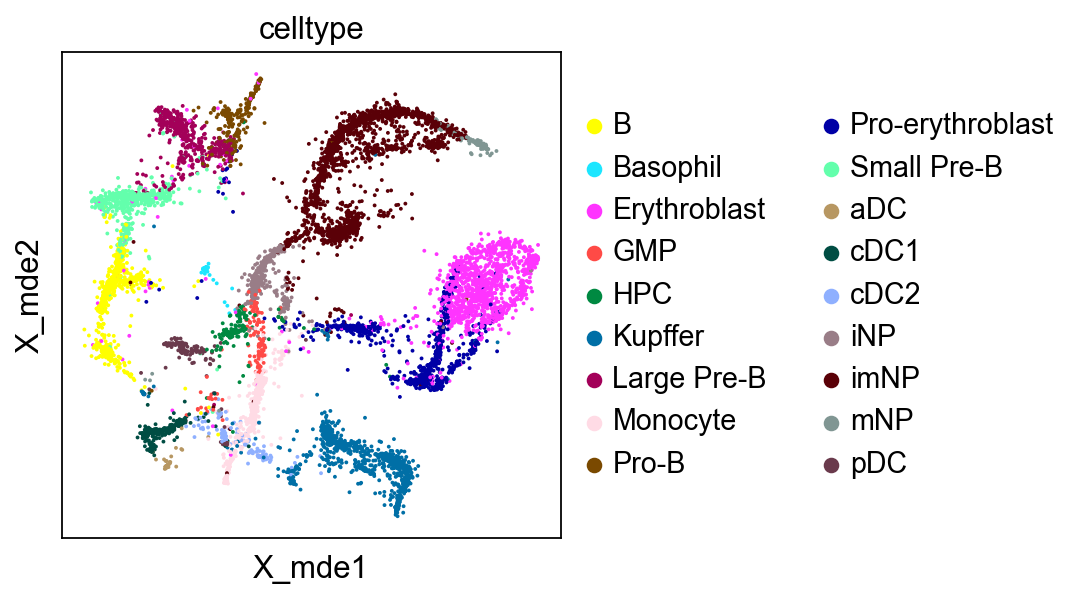

In [7]:
#['HPC','Pro-B','B',]
sc.pl.embedding(adata2,
                basis='X_mde',
           color=['celltype'],
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [8]:
v0 = ov.single.pyVIA(adata=adata2,adata_key='scaled|original|X_pca',adata_ncomps=100, basis='X_mde',
                         clusters='celltype',knn=15,random_seed=4,root_user=['HPC'],
                    dataset='group')
v0.run()

2023-10-17 23:12:19.355547	Running VIA over input data of 10000 (samples) x 50 (features)
2023-10-17 23:12:19.355798	Knngraph has 15 neighbors
2023-10-17 23:12:20.441565	Finished global pruning of 15-knn graph used for clustering at level of 0.15. Kept 48.1 % of edges. 
2023-10-17 23:12:20.469332	Number of connected components used for clustergraph  is 1
2023-10-17 23:12:20.617945	Commencing community detection
2023-10-17 23:12:21.109993	Finished running Leiden algorithm. Found 394 clusters.
2023-10-17 23:12:21.112442	Merging 345 very small clusters (<10)
2023-10-17 23:12:21.116189	Finished detecting communities. Found 49 communities
2023-10-17 23:12:21.116623	Making cluster graph. Global cluster graph pruning level: 0.15
2023-10-17 23:12:21.127450	Graph has 1 connected components before pruning
2023-10-17 23:12:21.129485	Graph has 1 connected components after pruning
2023-10-17 23:12:21.129611	Graph has 1 connected components after reconnecting
2023-10-17 23:12:21.130026	0.1% links tr

In [9]:
v0.get_pseudotime(adata2)
sc.pp.neighbors(adata2,n_neighbors= 15,use_rep='scaled|original|X_pca')
ov.utils.cal_paga(adata2,use_time_prior='pt_via',vkey='paga',
                 groups='celltype')

...the pseudotime of VIA added to AnnData obs named `pt_via`
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

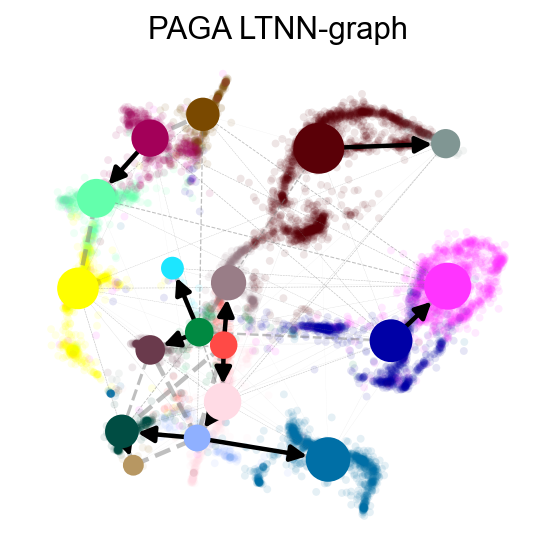

In [10]:
ov.utils.plot_paga(adata2,basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
#plt.title('PAGA Dentategyrus (BulkTrajBlend)',fontsize=13)

In [11]:
raw_transitions=pd.DataFrame(adata2.uns['paga']['transitions_confidence'].toarray(),
            index=adata2.obs['celltype'].cat.categories,
            columns=adata2.obs['celltype'].cat.categories)

In [12]:
raw_transitions

,B,Basophil,Erythroblast,GMP,HPC,Kupffer,Large Pre-B,Monocyte,Pro-B,Pro-erythroblast,Small Pre-B,aDC,cDC1,cDC2,iNP,imNP,mNP,pDC
B,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Basophil,0.0,0.0,0.0,0.000000,0.010337,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Erythroblast,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.048623,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
GMP,0.0,0.0,0.0,0.000000,0.010721,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
HPC,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Kupffer,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.014822,0.0,0.000000,0.0,0.0
Large Pre-B,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Monocyte,0.0,0.0,0.0,0.019727,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Pro-B,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
Pro-erythroblast,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [13]:
raw_transitions.loc['Basophil','HPC']

0.010337489860081428

In [14]:
def cor_mean(adata,generate_adata,celltype_key):
    cor_pd=ov.bulk2single.bulk2single_plot_correlation(adata,generate_adata,celltype_key=celltype_key,
                                           return_table=True)
    #sc.tl.rank_genes_groups(single_data, celltype_key, method='wilcoxon')
    marker_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(200)
    #marker = list(set(np.unique(np.ravel(np.array(marker_df))))&set(generate_adata.var.index.tolist()))
    marker = list(set(np.unique(np.ravel(np.array(marker_df))))&set(generate_adata.var.index.tolist()))

    # the mean expression of 200 marker genes of input sc data
    sc_marker = adata[:,marker].to_df()
    sc_marker['celltype'] = adata.obs[celltype_key]
    sc_marker_mean = sc_marker.groupby('celltype')[marker].mean()
    
    generate_sc_data_new = generate_adata[:,marker].to_df()
    generate_sc_data_new['celltype'] = generate_adata.obs[celltype_key]
    generate_sc_marker_mean = generate_sc_data_new.groupby('celltype')[marker].mean()

    intersect_cell = list(set(sc_marker_mean.index).intersection(set(generate_sc_marker_mean.index)))
    generate_sc_marker_mean= generate_sc_marker_mean.loc[intersect_cell]
    sc_marker_mean= sc_marker_mean.loc[intersect_cell]
    
    
    sc_marker_mean=sc_marker_mean.T
    rf_ct = list(sc_marker_mean.columns)
    cor_pd=pd.DataFrame(cor_pd,
                   index=rf_ct,
                   columns=rf_ct)
    return cor_pd
    
    

In [15]:
def cos_mean(adata,generate_adata,celltype_key):
    
    cmk1=ov.single.get_celltype_marker(generate_adata,clustertype=celltype_key,
                                  scores_type='logfoldchanges')
    cmk2=ov.single.get_celltype_marker(adata,clustertype=celltype_key,
                                  scores_type='logfoldchanges')
    
    cmk1={}
    for clt in generate_adata.obs[celltype_key].cat.categories:
        degs = sc.get.rank_genes_groups_df(generate_adata, group=clt, 
                                           key='rank_genes_groups', log2fc_min=2, 
                                           pval_cutoff=0.05)
        cmk1[clt]=degs['names'][:300].tolist()
        
    cmk2={}
    for clt in adata.obs[celltype_key].cat.categories:
        degs = sc.get.rank_genes_groups_df(adata, group=clt, 
                                           key='rank_genes_groups', log2fc_min=2, 
                                           pval_cutoff=0.05)
        cmk2[clt]=degs['names'][:300].tolist()
        
    all_gene=[]
    for clt in cmk1.keys():
        all_gene+=cmk1[clt]
    for clt in cmk2.keys():
        all_gene+=cmk2[clt]
    all_gene=list(set(all_gene))
    
    cmk1_pd=pd.DataFrame(index=all_gene)
    for clt in cmk1.keys():
        cmk1_pd[clt]=0
        cmk1_pd.loc[cmk1[clt],clt]=1
    cmk2_pd=pd.DataFrame(index=all_gene)
    for clt in cmk2.keys():
        cmk2_pd[clt]=0
        cmk2_pd.loc[cmk2[clt],clt]=1
        
    from scipy import spatial
    plot_data=pd.DataFrame(index=generate_adata.obs['celltype'].cat.categories,
                          columns=generate_adata.obs['celltype'].cat.categories)
    for clt1 in cmk1.keys():
        for clt2 in cmk1.keys():
        #print(clt,1 - spatial.distance.cosine(cmk1_pd['B'], cmk2_pd[clt]))
            plot_data.loc[clt1,clt2]=1 - spatial.distance.cosine(cmk1_pd[clt1], cmk2_pd[clt2])
    plot_data=plot_data.astype(float)
    return plot_data

## Cell cluster size

In [ ]:
bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=10000)
bulktb.vae_configure(scale_size=10)


In [34]:
bulktb.vae_model.cell_target_num

{'B': 35,
 'Basophil': 3,
 'Erythroblast': 63,
 'GMP': 38,
 'HPC': 42,
 'Kupffer': 97,
 'Large Pre-B': 15,
 'Monocyte': 23,
 'Pro-B': 0,
 'Pro-erythroblast': 23,
 'Small Pre-B': 39,
 'aDC': 24,
 'cDC1': 27,
 'cDC2': 40,
 'iNP': 25,
 'imNP': 45,
 'mNP': 0,
 'pDC': 33}

In [18]:
bulktb.vae_train(batch_size=256,
    learning_rate=1e-4,
    hidden_size=256,
    epoch_num=3500,
    vae_save_dir='model',
    vae_save_name=f'hpc_vae_scale_tape',
    generate_save_dir='output',
    generate_save_name=f'hpc_scale_tape')

...begin vae training


Train Epoch: 1969:  56%|█████▋    | 1970/3500 [31:46<24:40,  1.03it/s, loss=2.7977, min_loss=2.7793]

Early stopping at epoch 1971...
min loss = 2.7792533561587334
...vae training done!


...save trained vae in model/hpc_vae_scale_tape.pth.


In [30]:
import anndata
test_adata=bulktb.vae_generate(leiden_size=1)
#noisy_dict[scale_value]=test_adata.uns['noisy_leiden']

filter_leiden=list(test_adata.obs['celltype'].value_counts()[test_adata.obs['celltype'].value_counts()<10].index)
test_adata=test_adata[~test_adata.obs['celltype'].isin(filter_leiden)]
#sc.pp.highly_variable_genes(test_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#test_adata = test_adata[:, test_adata.var.highly_variable]

#cor_dict[scale_value]=cor_mean(adata_t,test_adata,'celltype')
#cos_dict[scale_value]=cos_mean(adata_t,test_adata,'celltype')
test_adata.write_h5ad(f'output/hpc_vae_scale_tape.h5ad')

#bulktb.gnn_configure(max_epochs=2000)
#bulktb.gnn_train()
#res_pd=bulktb.gnn_generate()
#adata_dict[scale_value]=bulktb.interpolation('OPC')
adata3=test_adata[test_adata.obs['celltype']=='Basophil']
#sc.pp.highly_variable_genes(bulktb.vae_model.single_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
#bulktb.vae_model.single_data = bulktb.vae_model.single_data[:, bulktb.vae_model.single_data.var.highly_variable]

adata_new=anndata.concat([bulktb.vae_model.single_data,adata3],
                 merge='same')
sc.pp.highly_variable_genes(
        adata_new,
        n_top_genes=3000,
    )
#sc.pp.highly_variable_genes(adata_dict[scale_value], min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_new = adata_new[:, adata_new.var.highly_variable]

ov.pp.scale(adata_new)
ov.pp.pca(adata_new,layer='scaled',n_pcs=50)
adata_new.obsm["X_mde"] = ov.utils.mde(adata_new.obsm["scaled|original|X_pca"])

...generating


generating: 100%|██████████| 572/572 [00:00<00:00, 19065.47it/s]

generated done!
extracting highly variable genes


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
The filter leiden is  []
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    

In [31]:
adata3

View of AnnData object with n_obs × n_vars = 0 × 13849
    obs: 'celltype', 'leiden'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'noisy_leiden'
    obsm: 'X_pca'
    obsp: 'distances', 'connectivities'

In [32]:
test_adata
ov.pp.scale(test_adata)
ov.pp.pca(test_adata,layer='scaled',n_pcs=50)
test_adata.obsm["X_mde"] = ov.utils.mde(test_adata.obsm["scaled|original|X_pca"])

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

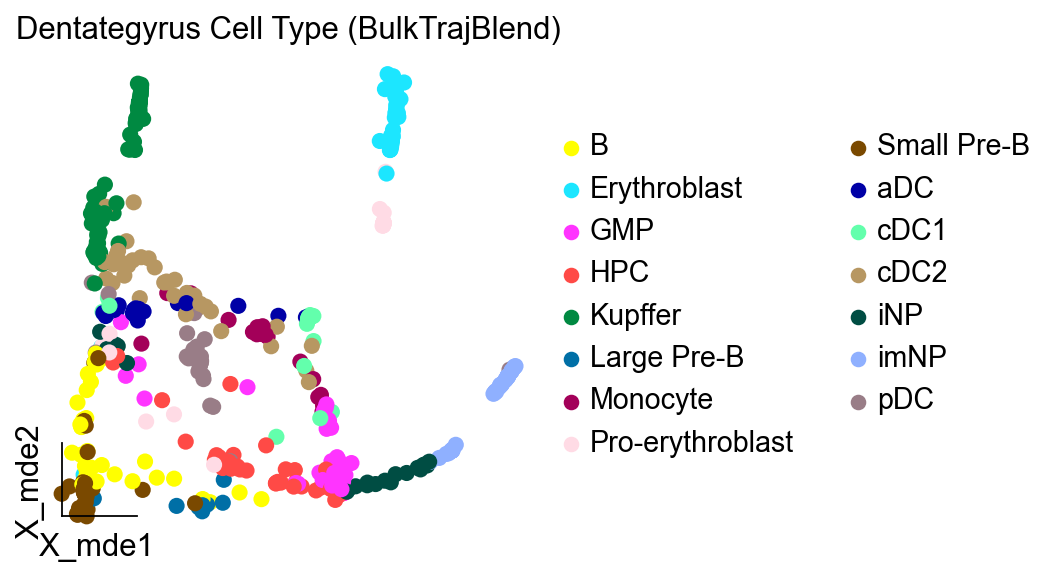

In [33]:
ov.utils.embedding(test_adata,
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

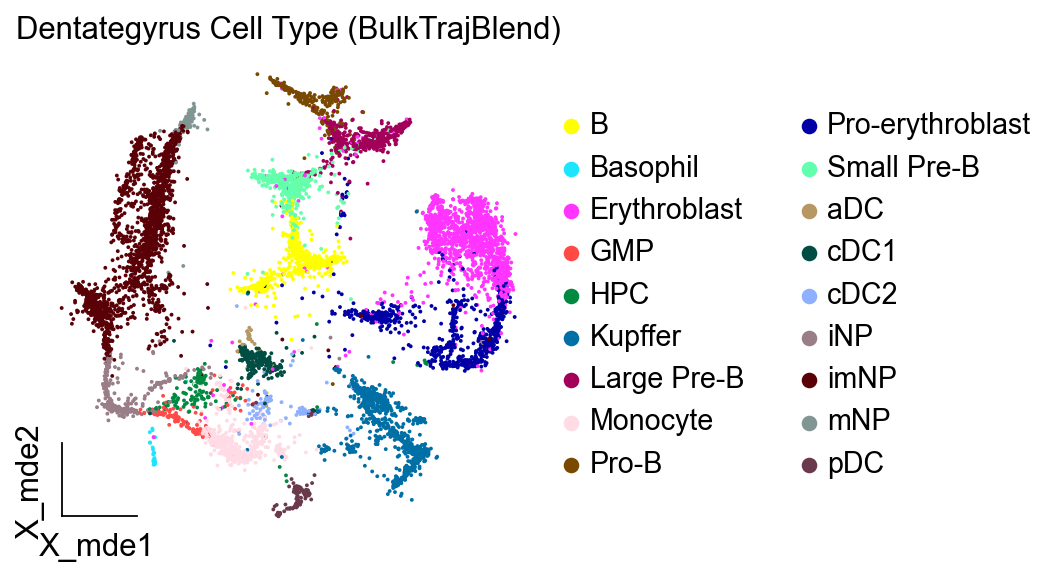

In [24]:
ov.utils.embedding(adata_new,
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [ ]:
adata

In [ ]:
import gc
for scale_value in [1,2,4,6,8,10]:
    bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=5000)
    bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*scale_value)
    bulktb.vae_train(batch_size=256,
        learning_rate=1e-4,
        hidden_size=256,
        epoch_num=3500,
        vae_save_dir='model',
        vae_save_name=f'hpc_vae_scale_5000_{scale_value}',
        generate_save_dir='output',
        generate_save_name=f'hpc_scale_5000_{scale_value}')
    gc.collect()

In [207]:
print('success')

success


In [19]:
bulktb.vae_model.single_data.X.max()

8.499954

In [ ]:
import anndata
cos_dict={}
cor_dict={}
adata_dict={}
noisy_dict={}
for scale_value in [1,2,4,6,8,10]:
    bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=10000)
    bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*scale_value)
    bulktb.vae_load(f'model/hpc_vae_scale_{scale_value}.pth')
    test_adata=bulktb.vae_generate(leiden_size=25)
    sc.pp.highly_variable_genes(
        test_adata,
        n_top_genes=2000,
    )
    #sc.pp.highly_variable_genes(test_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    test_adata = test_adata[:, test_adata.var.highly_variable]
    noisy_dict[scale_value]=test_adata.uns['noisy_leiden']
    
    filter_leiden=list(test_adata.obs['celltype'].value_counts()[test_adata.obs['celltype'].value_counts()<10].index)
    test_adata=test_adata[~test_adata.obs['celltype'].isin(filter_leiden)]
    #sc.pp.highly_variable_genes(test_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    #test_adata = test_adata[:, test_adata.var.highly_variable]
    
    cor_dict[scale_value]=cor_mean(adata_t,test_adata,'celltype')
    cos_dict[scale_value]=cos_mean(adata_t,test_adata,'celltype')
    test_adata.write_h5ad(f'output/hpc_vae_scale_{scale_value}.h5ad')
    
    #bulktb.gnn_configure(max_epochs=2000)
    #bulktb.gnn_train()
    #res_pd=bulktb.gnn_generate()
    #adata_dict[scale_value]=bulktb.interpolation('OPC')
    adata3=test_adata[test_adata.obs['celltype']=='Basophil']
    #sc.pp.highly_variable_genes(bulktb.vae_model.single_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
    #bulktb.vae_model.single_data = bulktb.vae_model.single_data[:, bulktb.vae_model.single_data.var.highly_variable]
    
    adata_dict[scale_value]=anndata.concat([bulktb.vae_model.single_data,adata3],
                     merge='same')
    sc.pp.highly_variable_genes(
            adata_dict[scale_value],
            n_top_genes=3000,
        )
    #sc.pp.highly_variable_genes(adata_dict[scale_value], min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata_dict[scale_value] = adata_dict[scale_value][:, adata_dict[scale_value].var.highly_variable]
    
    ov.pp.scale(adata_dict[scale_value])
    ov.pp.pca(adata_dict[scale_value],layer='scaled',n_pcs=50)
    adata_dict[scale_value].obsm["X_mde"] = ov.utils.mde(adata_dict[scale_value].obsm["scaled|original|X_pca"])

In [356]:
for scale_value in [1,2,4,6,8,10]:
    # 计算对角线均值
    diagonal_mean = np.trace(cor_dict[scale_value].values) / len(cor_dict[scale_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cor_dict[scale_value].values) - np.trace(cor_dict[scale_value].values)) / (len(cor_dict[scale_value])**2 - len(cor_dict[scale_value]))

    print(scale_value,"对角线均值:", diagonal_mean,"非对角线均值:", non_diagonal_mean)

1 对角线均值: 0.9928007929329232 非对角线均值: 0.415896191484956
2 对角线均值: 0.9941224558443188 非对角线均值: 0.4674026845073341
4 对角线均值: 0.9938088946947077 非对角线均值: 0.4578150068774254
6 对角线均值: 0.9946565104336204 非对角线均值: 0.4735513860580416
8 对角线均值: 0.9907093698083145 非对角线均值: 0.46983260976586755
10 对角线均值: 0.9918707036920209 非对角线均值: 0.45365572002128046


In [357]:
for scale_value in [1,2,4,6,8,10]:
    # 计算对角线均值
    diagonal_mean = np.trace(cos_dict[scale_value].values) / len(cos_dict[scale_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cos_dict[scale_value].values) - np.trace(cos_dict[scale_value].values)) / (len(cos_dict[scale_value])**2 - len(cos_dict[scale_value]))

    print(scale_value,"对角线均值:", diagonal_mean,"非对角线均值:", non_diagonal_mean)

1 对角线均值: 0.4599307714938916 非对角线均值: 0.04086844153131483
2 对角线均值: 0.47238037777476155 非对角线均值: 0.04167907000073759
4 对角线均值: 0.4521212144197746 非对角线均值: 0.04166521694555574
6 对角线均值: 0.4731409531547314 非对角线均值: 0.04404610140839815
8 对角线均值: 0.47036606293361594 非对角线均值: 0.04306831748783864
10 对角线均值: 0.4709321816447164 非对角线均值: 0.04374174458080335


In [358]:
for scale_value in [1,2,4,6,8,10]:
    print(scale_value,len(noisy_dict[scale_value]))

1 1
2 0
4 6
6 23
8 23
10 32


In [251]:
test_adata
ov.pp.scale(test_adata)
ov.pp.pca(test_adata,layer='scaled',n_pcs=50)
test_adata.obsm["X_mde"] = ov.utils.mde(test_adata.obsm["scaled|original|X_pca"])

In [252]:
test_adata

AnnData object with n_obs × n_vars = 5198 × 3000
    obs: 'celltype', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'noisy_leiden', 'rank_genes_groups', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_mde'
    varm: 'scaled|original|pca_loadings'
    layers: 'scaled', 'lognorm'
    obsp: 'distances', 'connectivities'

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

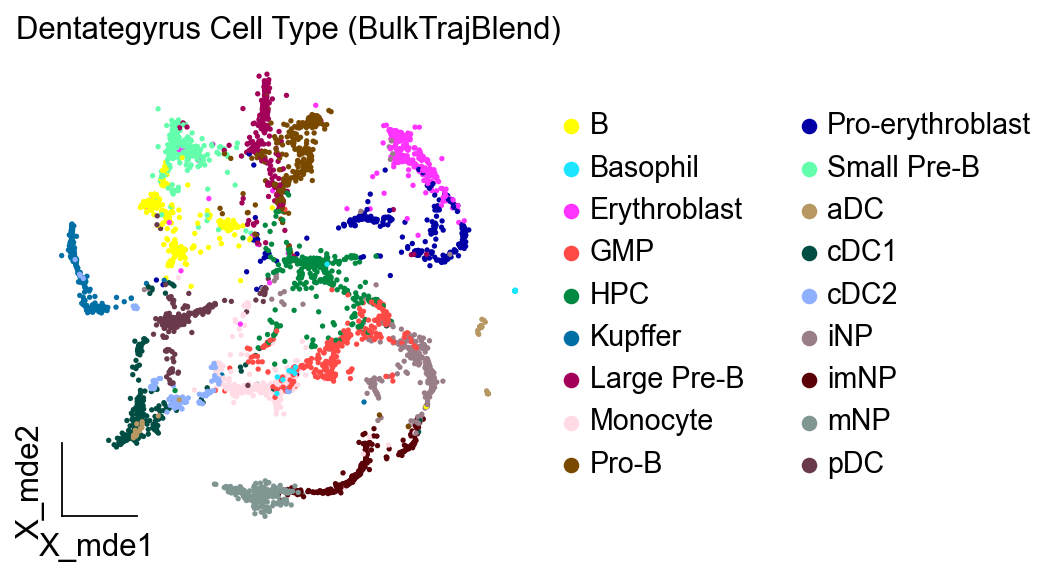

In [253]:
ov.utils.embedding(test_adata,
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [322]:
for scale_value in [1,2,4,6,8,10]:
    print(adata_dict[scale_value].shape)

(10063, 3000)
(10126, 3000)
(10252, 3000)
(10342, 3000)
(10432, 3000)
(10500, 3000)


In [359]:
for scale_value in [1,2,4,6,8,10]:
    adata_dict[scale_value].uns['celltype_colors']=sc.pl.palettes.default_102

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

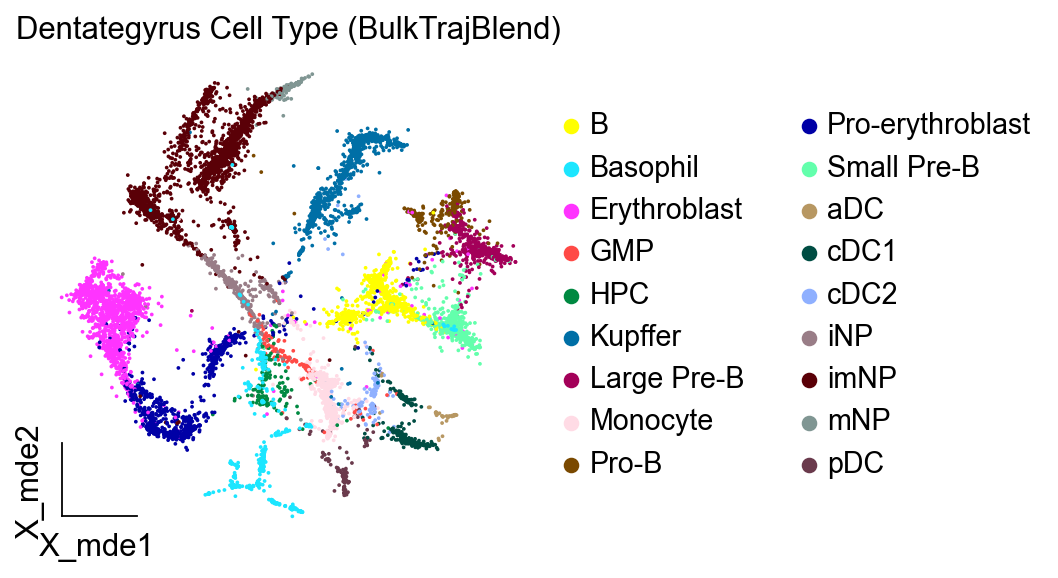

In [367]:
ov.utils.embedding(adata_dict[10],
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [330]:
via_dict.keys()

dict_keys([64, 128, 256, 512, 1024])

In [360]:
via_dict={}
for scale_value in [1,2,4,6,8,10]:
    via_dict[scale_value] = ov.single.pyVIA(adata=adata_dict[scale_value],adata_key='scaled|original|X_pca',adata_ncomps=100, basis='X_mde',
                             clusters='celltype',knn=15,random_seed=112,root_user=['HPC'],
                        dataset='group')
    via_dict[scale_value].run()
    via_dict[scale_value].get_pseudotime(adata_dict[scale_value])
    sc.pp.neighbors(adata_dict[scale_value],n_neighbors= 15,use_rep='scaled|original|X_pca')
    ov.utils.cal_paga(adata_dict[scale_value],use_time_prior='pt_via',vkey='paga',
                     groups='celltype')
    

2023-10-17 17:46:00.548401	From root 36,  the Terminal state 28 is reached 7 times.
2023-10-17 17:46:01.686248	From root 36,  the Terminal state 29 is reached 5 times.
2023-10-17 17:46:02.770654	From root 36,  the Terminal state 31 is reached 82 times.
2023-10-17 17:46:03.807218	From root 36,  the Terminal state 34 is reached 201 times.
2023-10-17 17:46:04.918780	From root 36,  the Terminal state 35 is reached 63 times.
2023-10-17 17:46:05.977158	From root 36,  the Terminal state 39 is reached 163 times.
2023-10-17 17:46:07.055278	From root 36,  the Terminal state 40 is reached 137 times.
2023-10-17 17:46:08.116992	From root 36,  the Terminal state 47 is reached 186 times.
2023-10-17 17:46:09.235652	From root 36,  the Terminal state 49 is reached 38 times.
2023-10-17 17:46:09.355057	Terminal clusters corresponding to unique lineages are {0: 'Small Pre-B', 3: 'imNP', 6: 'Erythroblast', 15: 'Erythroblast', 16: 'Erythroblast', 17: 'B', 21: 'Kupffer', 25: 'B', 28: 'Pro-B', 29: 'Large Pre-B

In [ ]:
for scale_value in [1,2,4,6,8,10]:
    adata_dict[scale_value].uns['iroot'] = np.flatnonzero(adata_dict[scale_value].obs['celltype']  == 'nIPC')[0]
    sc.tl.dpt(adata_dict[scale_value])
    ov.utils.cal_paga(adata_dict[scale_value],use_time_prior='dpt_pseudotime',vkey='paga',
                         groups='celltype')

In [ ]:
import scvelo as scv
for scale_value in [1,2,4,6,8,10]:
    #adata_dict[scale_value].uns['iroot'] = np.flatnonzero(adata_dict[scale_value].obs['celltype']  == 'nIPC')[0]
    #sc.tl.dpt(adata_dict[scale_value])
    adata_dict[scale_value].layers["spliced"] = adata_dict[scale_value].X
    adata_dict[scale_value].layers["unspliced"] = adata_dict[scale_value].X
    scv.pp.moments(adata_dict[scale_value], n_pcs=30, n_neighbors=30)
    from cellrank.kernels import CytoTRACEKernel
    ctk = CytoTRACEKernel(adata_dict[scale_value]).compute_cytotrace()
    ov.utils.cal_paga(adata_dict[scale_value],use_time_prior='ct_pseudotime',vkey='paga',
                         groups='celltype')

<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

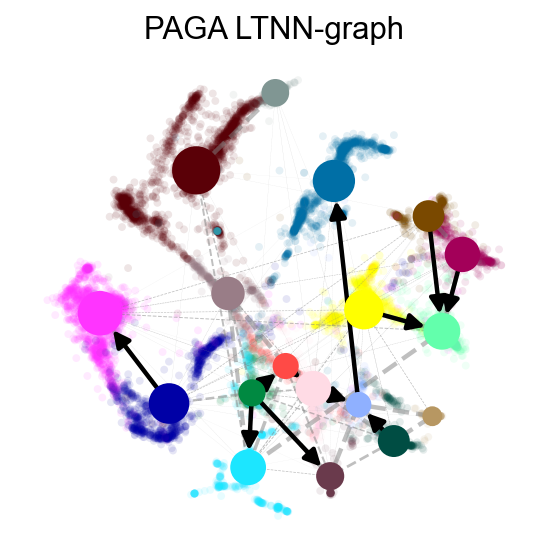

In [372]:
ov.utils.plot_paga(adata_dict[10],basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
#plt.title('PAGA Dentategyrus (BulkTrajBlend)',fontsize=13)

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

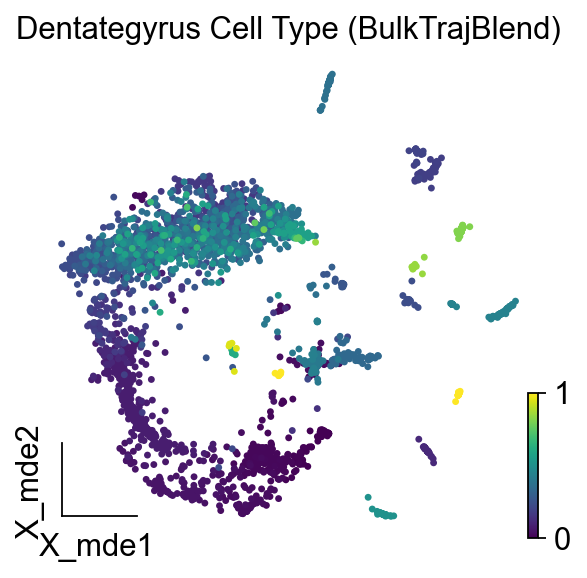

In [171]:
ov.utils.embedding(adata_dict[4],
                basis='X_mde',
           color=['pt_via'],title='Dentategyrus Cell Type (BulkTrajBlend)',
            frameon='small',show=False,
           wspace=0.4)

In [373]:
transitions_dict={}
for scale_value in [1,2,4,6,8,10]:
    after_transitions=pd.DataFrame(adata_dict[scale_value].uns['paga']['transitions_confidence'].toarray(),
                index=adata_dict[scale_value].obs['celltype'].cat.categories,
                columns=adata_dict[scale_value].obs['celltype'].cat.categories)
    transitions_dict[scale_value]=after_transitions

In [374]:
res={}
for scale_value in [1,2,4,6,8,10]:
    res_dict={}

    #Cor:exp
    # 计算对角线均值
    diagonal_mean = np.trace(cor_dict[scale_value].values) / len(cor_dict[scale_value])
    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cor_dict[scale_value].values) - np.trace(cor_dict[scale_value].values)) / (len(cor_dict[scale_value])**2 - len(cor_dict[scale_value]))

    res_dict['Cor_mean']=diagonal_mean
    res_dict['non_Cor_mean']=non_diagonal_mean

    #Cos:gene
    # 计算对角线均值
    diagonal_mean = np.trace(cos_dict[scale_value].values) / len(cos_dict[scale_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cos_dict[scale_value].values) - np.trace(cos_dict[scale_value].values)) / (len(cos_dict[scale_value])**2 - len(cos_dict[scale_value]))

    res_dict['Cos_mean']=diagonal_mean
    res_dict['non_Cos_mean']=non_diagonal_mean

    #raw:trans
    res_dict['Trans_raw']=0
    res_dict['Trans_after']=transitions_dict[scale_value].loc['Basophil'].max()


    #Variance
    res_dict['Var_raw']=np.var(adata2.obs.loc[adata2.obs['celltype']=='Basophil','pt_via'])
    res_dict['Var_after']=np.var(adata_dict[scale_value].obs.loc[adata_dict[scale_value].obs['celltype']=='Basophil','pt_via'])
    
    res_dict['noisy']=len(noisy_dict[scale_value])
    res_dict['Inter_cells']=adata_dict[scale_value].shape[0]-adata2.shape[0]
    res[scale_value]=res_dict

In [380]:
res[1]

{'Cor_mean': 0.9928007929329232,
 'non_Cor_mean': 0.415896191484956,
 'Cos_mean': 0.4599307714938916,
 'non_Cos_mean': 0.04086844153131483,
 'Trans_raw': 0,
 'Trans_after': 0.010507706946984205,
 'Var_raw': 0.0003527858476859607,
 'Var_after': 0.01180597570354572,
 'noisy': 1,
 'Inter_cells': 63}

In [381]:
import pickle
with open('result/metric_hpc_cell_scale.pkl','wb') as f:
    pickle.dump(res,f)

## hidden_size

In [ ]:
import gc
for hidden_value in [64,128,256,512,1024]:
    bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=10000)
    bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*2)
    bulktb.vae_train(batch_size=256,
        learning_rate=1e-4,
        hidden_size=hidden_value,
        epoch_num=3500,
        vae_save_dir='model',
        vae_save_name=f'hpc_vae_hidden_{hidden_value}',
        generate_save_dir='output',
        generate_save_name=f'hpc_hidden_{hidden_value}')
    gc.collect()

In [ ]:
import anndata
cos_dict={}
cor_dict={}
adata_dict={}
noisy_dict={}
for hidden_value in [64,128,256,512,1024]:
    bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=10000)
    bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*2)
    bulktb.vae_load(f'model/hpc_vae_hidden_{hidden_value}.pth',hidden_size=hidden_value)
    test_adata=bulktb.vae_generate(leiden_size=25)
    
    noisy_dict[hidden_value]=test_adata.uns['noisy_leiden']
    
    filter_leiden=list(test_adata.obs['celltype'].value_counts()[test_adata.obs['celltype'].value_counts()<10].index)
    test_adata=test_adata[~test_adata.obs['celltype'].isin(filter_leiden)]
    sc.pp.highly_variable_genes(
        test_adata,
        n_top_genes=3000,
    )
    #sc.pp.highly_variable_genes(test_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    test_adata = test_adata[:, test_adata.var.highly_variable]
    
    cor_dict[hidden_value]=cor_mean(adata_t,test_adata,'celltype')
    cos_dict[hidden_value]=cos_mean(adata_t,test_adata,'celltype')
    test_adata.write_h5ad(f'output/hpc_vae_scale_{scale_value}.h5ad')
    
    #bulktb.gnn_configure(max_epochs=2000)
    #bulktb.gnn_train()
    #res_pd=bulktb.gnn_generate()
    #adata_dict[scale_value]=bulktb.interpolation('OPC')
    adata3=test_adata[test_adata.obs['celltype']=='Basophil']
    #sc.pp.highly_variable_genes(bulktb.vae_model.single_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
    #bulktb.vae_model.single_data = bulktb.vae_model.single_data[:, bulktb.vae_model.single_data.var.highly_variable]
    
    adata_dict[hidden_value]=anndata.concat([bulktb.vae_model.single_data,adata3],
                     merge='same')
    sc.pp.highly_variable_genes(
            adata_dict[hidden_value],
            n_top_genes=3000,
        )
    #sc.pp.highly_variable_genes(adata_dict[scale_value], min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata_dict[hidden_value] = adata_dict[hidden_value][:, adata_dict[hidden_value].var.highly_variable]
    
    ov.pp.scale(adata_dict[hidden_value])
    ov.pp.pca(adata_dict[hidden_value],layer='scaled',n_pcs=50)
    adata_dict[hidden_value].obsm["X_mde"] = ov.utils.mde(adata_dict[hidden_value].obsm["scaled|original|X_pca"])

In [57]:
bulktb.vae_model.single_data

AnnData object with n_obs × n_vars = 10000 × 18648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [56]:
adata3

View of AnnData object with n_obs × n_vars = 303 × 13849
    obs: 'celltype', 'leiden'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'noisy_leiden', 'rank_genes_groups'
    obsm: 'X_pca'
    obsp: 'distances', 'connectivities'

In [295]:
for hidden_value in [64,128,256,512,1024]:
    # 计算对角线均值
    diagonal_mean = np.trace(cor_dict[hidden_value].values) / len(cor_dict[hidden_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cor_dict[hidden_value].values) - np.trace(cor_dict[hidden_value].values)) / (len(cor_dict[hidden_value])**2 - len(cor_dict[hidden_value]))

    print(hidden_value,"对角线均值:", diagonal_mean,"非对角线均值:", non_diagonal_mean)

64 对角线均值: 0.9930063991352323 非对角线均值: 0.4832598644571253
128 对角线均值: 0.9939262404171514 非对角线均值: 0.4574833186037878
256 对角线均值: 0.991681417599657 非对角线均值: 0.48141250266749513
512 对角线均值: 0.9940281114658229 非对角线均值: 0.45433469569034357
1024 对角线均值: 0.9933928383841794 非对角线均值: 0.4821321080461145


In [296]:
for hidden_value in [64,128,256,512,1024]:
    # 计算对角线均值
    diagonal_mean = np.trace(cos_dict[hidden_value].values) / len(cos_dict[hidden_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cos_dict[hidden_value].values) - np.trace(cos_dict[hidden_value].values)) / (len(cos_dict[hidden_value])**2 - len(cos_dict[hidden_value]))

    print(hidden_value,"对角线均值:", diagonal_mean,"非对角线均值:", non_diagonal_mean)

64 对角线均值: 0.5259956907478052 非对角线均值: 0.046453641719569616
128 对角线均值: 0.5278890606307199 非对角线均值: 0.04553499999371597
256 对角线均值: 0.5068551621646054 非对角线均值: 0.04461125771641395
512 对角线均值: 0.5326851809395353 非对角线均值: 0.046463588356044784
1024 对角线均值: 0.5229754735718335 非对角线均值: 0.04566857089643095


In [297]:
for hidden_value in [64,128,256,512,1024]:
    print(hidden_value,len(noisy_dict[hidden_value]))

64 0
128 0
256 0
512 1
1024 0


<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

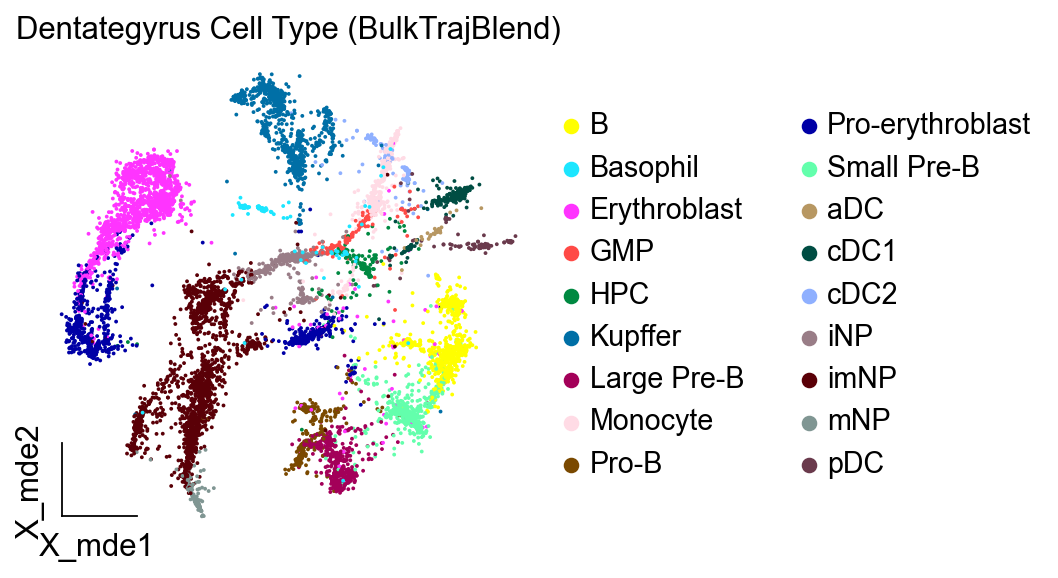

In [302]:
ov.utils.embedding(adata_dict[1024],
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [303]:
via_dict={}
for hidden_value in [64,128,256,512,1024]:
    via_dict[hidden_value] = ov.single.pyVIA(adata=adata_dict[hidden_value],adata_key='scaled|original|X_pca',adata_ncomps=100, basis='X_mde',
                             clusters='celltype',knn=15,random_seed=112,root_user=['HPC'],
                        dataset='group')
    via_dict[hidden_value].run()
    via_dict[hidden_value].get_pseudotime(adata_dict[hidden_value])
    sc.pp.neighbors(adata_dict[hidden_value],n_neighbors= 15,use_rep='scaled|original|X_pca')
    ov.utils.cal_paga(adata_dict[hidden_value],use_time_prior='pt_via',vkey='paga',
                     groups='celltype')
    

    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
2023-10-17 17:27:27.615376	Running VIA over input data of 10126 (samples) x 50 (features)
2023-10-17 17:27:27.615393	Knngraph has 15 neighbors
2023-10-17 17:27:28.544232	Finished global pruning of 15-knn graph used for clustering at level of 0.15. Kept 48.5 % of edges. 
2023-10-17 17:27:28.571870	Number of connected components used for clustergraph  is 1
2023-10-17 17:27:28.713751	Commencing community detection
2023-10-17 17:27:29.199807	Finished running Leiden algorithm. Found 501 clusters.
2023-10-17 17:27:29.202019	Merging 456 very small clusters (<10)
2023-10-17 17:27:29.205752	Finished detecting communities. Found 45 communities
2023-10-17 17:27:29.206184	Making cluster graph. Global cluster graph pruning level: 0.15
2023-10-17 17:27:29.216188	Graph has 1 connected c

<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

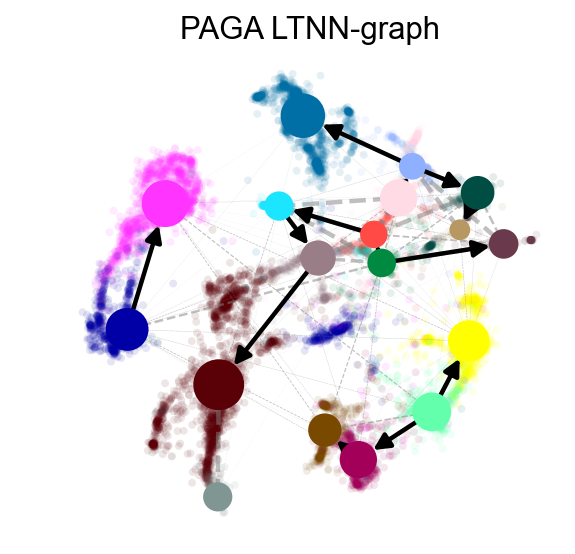

In [309]:
ov.utils.plot_paga(adata_dict[1024],basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
#plt.title('PAGA Dentategyrus (BulkTrajBlend)',fontsize=13)

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

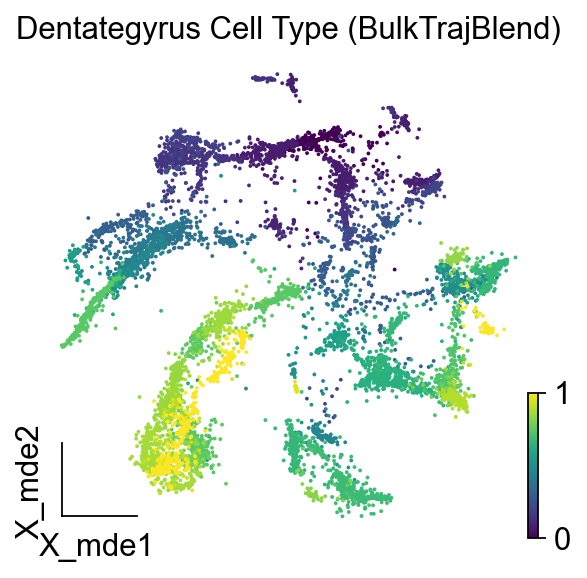

In [304]:
ov.utils.embedding(adata_dict[64],
                basis='X_mde',
           color=['pt_via'],title='Dentategyrus Cell Type (BulkTrajBlend)',
            frameon='small',show=False,
           wspace=0.4)

In [310]:
transitions_dict={}
for hidden_value in [64,128,256,512,1024]:
    after_transitions=pd.DataFrame(adata_dict[hidden_value].uns['paga']['transitions_confidence'].toarray(),
                index=adata_dict[hidden_value].obs['celltype'].cat.categories,
                columns=adata_dict[hidden_value].obs['celltype'].cat.categories)
    transitions_dict[hidden_value]=after_transitions

In [311]:
res={}
for hidden_value in [64,128,256,512,1024]:
    res_dict={}

    #Cor:exp
    # 计算对角线均值
    diagonal_mean = np.trace(cor_dict[hidden_value].values) / len(cor_dict[hidden_value])
    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cor_dict[hidden_value].values) - np.trace(cor_dict[hidden_value].values)) / (len(cor_dict[hidden_value])**2 - len(cor_dict[hidden_value]))

    res_dict['Cor_mean']=diagonal_mean
    res_dict['non_Cor_mean']=non_diagonal_mean

    #Cos:gene
    # 计算对角线均值
    diagonal_mean = np.trace(cos_dict[hidden_value].values) / len(cos_dict[hidden_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cos_dict[hidden_value].values) - np.trace(cos_dict[hidden_value].values)) / (len(cos_dict[hidden_value])**2 - len(cos_dict[hidden_value]))

    res_dict['Cos_mean']=diagonal_mean
    res_dict['non_Cos_mean']=non_diagonal_mean

    #raw:trans
    res_dict['Trans_raw']=0
    res_dict['Trans_after']=transitions_dict[hidden_value].loc['Basophil'].max()


    #Variance
    res_dict['Var_raw']=np.var(adata2.obs.loc[adata2.obs['celltype']=='Basophil','pt_via'])
    res_dict['Var_after']=np.var(adata_dict[hidden_value].obs.loc[adata_dict[hidden_value].obs['celltype']=='Basophil','pt_via'])
    
    res_dict['noisy']=len(noisy_dict[hidden_value])
    res_dict['Inter_cells']=adata_dict[hidden_value].shape[0]-adata2.shape[0]
    res[hidden_value]=res_dict

In [65]:
adata2.shape[0]

10000

In [66]:
adata_dict[hidden_value].shape[0]

10303

In [67]:
test_adata.shape[0]

6826

In [317]:
import pickle
with open('result/metric_hpc_hidden.pkl','wb') as f:
    pickle.dump(res,f)

In [316]:
res[1024]

{'Cor_mean': 0.9933928383841794,
 'non_Cor_mean': 0.4821321080461145,
 'Cos_mean': 0.5229754735718335,
 'non_Cos_mean': 0.04566857089643095,
 'Trans_raw': 0,
 'Trans_after': 0.014598637372036238,
 'Var_raw': 0.0003527858476859607,
 'Var_after': 0.014261120996451122,
 'noisy': 0,
 'Inter_cells': 126}

## Cell all size

In [7]:
bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=1000)
bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*4)

......random select 1000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data


In [10]:
import gc
cell_dict={}
for cell_value in [1000,2000,5000,10000,20000]:
    bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=cell_value)
    bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*4)
    cell_dict[cell_value]=bulktb.vae_model.single_data.copy()
    bulktb.vae_train(batch_size=256,
        learning_rate=1e-4,
        hidden_size=256,
        epoch_num=3500,
        vae_save_dir='model',
        vae_save_name=f'hpc_vae_cell_{cell_value}',
        generate_save_dir='output',
        generate_save_name=f'hpc_cell_{cell_value}')
    gc.collect()

......random select 1000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data
...begin vae training


Train Epoch: 3001:  86%|████████▌ | 3002/3500 [04:56<00:49, 10.14it/s, loss=0.1834, min_loss=0.1818]


Early stopping at epoch 3003...
min loss = 0.18175529316067696
...vae training done!
...save trained vae in model/hpc_vae_cell_1000.pth.
......random select 2000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data
...begin vae training


Train Epoch: 3499: 100%|██████████| 3500/3500 [16:57<00:00,  3.44it/s, loss=0.3646, min_loss=0.3633]


min loss = 0.3632729798555374
...vae training done!
...save trained vae in model/hpc_vae_cell_2000.pth.
......random select 5000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data
...begin vae training


Train Epoch: 3295:  94%|█████████▍| 3296/3500 [41:18<02:33,  1.33it/s, loss=1.0804, min_loss=1.0772]

Early stopping at epoch 3297...
min loss = 1.0772235840559006
...vae training done!


...save trained vae in model/hpc_vae_cell_5000.pth.
......random select 10000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data
...begin vae training


Train Epoch: 2453:  70%|███████   | 2454/3500 [39:38<16:53,  1.03it/s, loss=2.6904, min_loss=2.6658]

Early stopping at epoch 2455...
min loss = 2.665757939219475
...vae training done!


...save trained vae in model/hpc_vae_cell_10000.pth.
......random select 20000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data
...begin vae training


Train Epoch: 2174:  62%|██████▏   | 2175/3500 [1:10:51<43:09,  1.95s/it, loss=6.0826, min_loss=6.0794]

Early stopping at epoch 2176...
min loss = 6.079418621957302
...vae training done!


...save trained vae in model/hpc_vae_cell_20000.pth.


In [65]:
adata.X.max()

8615.0

In [18]:
import anndata
cos_dict={}
cor_dict={}
adata_dict={}
noisy_dict={}
for cell_value in [1000,2000,5000,10000,20000]:
    bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                        bulk_group=bulk.columns.tolist(),
                                        celltype_key='celltype',max_single_cells=cell_value)
    bulktb.vae_configure(cell_target_num=adata.obs['celltype'].value_counts().loc['Basophil']*4)
    bulktb.vae_load(f'model/hpc_vae_cell_{cell_value}.pth',hidden_size=256)
    test_adata=bulktb.vae_generate(leiden_size=25)
    
    noisy_dict[cell_value]=test_adata.uns['noisy_leiden']
    
    filter_leiden=list(test_adata.obs['celltype'].value_counts()[test_adata.obs['celltype'].value_counts()<10].index)
    test_adata=test_adata[~test_adata.obs['celltype'].isin(filter_leiden)]
    test_adata.raw=test_adata.copy()
    sc.pp.highly_variable_genes(
        test_adata,
        n_top_genes=3000,
    )
    #sc.pp.highly_variable_genes(test_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    test_adata = test_adata[:, test_adata.var.highly_variable]
    
    cor_dict[cell_value]=cor_mean(adata_t,test_adata,'celltype')
    cos_dict[cell_value]=cos_mean(adata_t,test_adata,'celltype')
    #test_adata=test_adata.raw.to_adata()
    test_adata.write_h5ad(f'output/hpc_vae_cell_{cell_value}.h5ad')
    
    #bulktb.gnn_configure(max_epochs=2000)
    #bulktb.gnn_train()
    #res_pd=bulktb.gnn_generate()
    #adata_dict[scale_value]=bulktb.interpolation('OPC')
    adata3=test_adata[test_adata.obs['celltype']=='Basophil']
    #sc.pp.highly_variable_genes(bulktb.vae_model.single_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
    #bulktb.vae_model.single_data = bulktb.vae_model.single_data[:, bulktb.vae_model.single_data.var.highly_variable]
    
    adata_dict[cell_value]=anndata.concat([bulktb.vae_model.single_data,adata3],
                     merge='same')
    sc.pp.highly_variable_genes(
            adata_dict[cell_value],
            n_top_genes=3000,
        )
    #sc.pp.highly_variable_genes(adata_dict[scale_value], min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata_dict[cell_value] = adata_dict[cell_value][:, adata_dict[cell_value].var.highly_variable]
    
    ov.pp.scale(adata_dict[cell_value])
    ov.pp.pca(adata_dict[cell_value],layer='scaled',n_pcs=50)
    adata_dict[cell_value].obsm["X_mde"] = ov.utils.mde(adata_dict[cell_value].obsm["scaled|original|X_pca"])

......random select 1000 single cells
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)
......log1p the single data
......prepare the input of bulk2single
...loading data
loading model from model/hpc_vae_cell_1000.pth
loading model from model/hpc_vae_cell_1000.pth
...generating


generating: 100%|██████████| 14112/14112 [00:00<00:00, 16636.92it/s]


generated done!
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 71 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)
The filter leiden is  ['53', '54', '55', '56', '57', '58', '59', '63', '65', '64', '62', '61', '60', '66', '67', '68', '69', '70']
If you pass `n_to

generating: 100%|██████████| 14112/14112 [00:00<00:00, 16703.79it/s]


generated done!
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 93 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
The filter leiden is  ['67', '69', '70', '68', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '83', '84', '81', '82', '85', '86', '87',

generating: 100%|██████████| 14112/14112 [00:00<00:00, 19240.35it/s]


generated done!
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 84 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
The filter leiden is  ['43', '45', '46', '47', '44', '48', '49', '54', '57', '56', '55', '52', '53', '51', '50', '58', '59', '65', '64', '63', '62',

generating: 100%|██████████| 14112/14112 [00:00<00:00, 18807.07it/s]


generated done!
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 96 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
The filter leiden is  ['34', '35', '36', '37', '50', '49', '44', '47', '46', '45', '48', '43', '41', '40', '39', '38', '42', '53', '54', '52', '51',

generating: 100%|██████████| 14112/14112 [00:00<00:00, 19668.50it/s]


generated done!
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 76 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
The filter leiden is  ['37', '44', '48', '47', '46', '45', '38', '43', '41', '40', '39', '42', '56', '63', '62', '61', '59', '58', '57', '60', '55',

In [57]:
bulktb.vae_model.single_data

AnnData object with n_obs × n_vars = 10000 × 18648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [30]:
adata

AnnData object with n_obs × n_vars = 29370 × 18648
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'lib_ID', 'lib', 'percent.mt', 'timepoint', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'timepoint_colors'
    obsm: 'X_mde', 'X_mde_hpc', 'scaled|original|X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [19]:
for cell_value in [1000,2000,5000,10000,20000]:
    # 计算对角线均值
    diagonal_mean = np.trace(cor_dict[cell_value].values) / len(cor_dict[cell_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cor_dict[cell_value].values) - np.trace(cor_dict[cell_value].values)) / (len(cor_dict[cell_value])**2 - len(cor_dict[cell_value]))

    print(cell_value,"对角线均值:", diagonal_mean,"非对角线均值:", non_diagonal_mean)

1000 对角线均值: 0.9531482341691153 非对角线均值: 0.6246709940561689
2000 对角线均值: 0.9548325608610545 非对角线均值: 0.5780632798403341
5000 对角线均值: 0.9837899855859406 非对角线均值: 0.5548741533641048
10000 对角线均值: 0.9935055333653001 非对角线均值: 0.4753317569360293
20000 对角线均值: 0.9965568015207151 非对角线均值: 0.4710078697301087


In [20]:
for cell_value in [1000,2000,5000,10000,20000]:
    # 计算对角线均值
    diagonal_mean = np.trace(cos_dict[cell_value].values) / len(cos_dict[cell_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cos_dict[cell_value].values) - np.trace(cos_dict[cell_value].values)) / (len(cos_dict[cell_value])**2 - len(cos_dict[cell_value]))

    print(cell_value,"对角线均值:", diagonal_mean,"非对角线均值:", non_diagonal_mean)

1000 对角线均值: 0.3629397934807578 非对角线均值: 0.038172672890022775
2000 对角线均值: 0.42520942251044647 非对角线均值: 0.0425246855424799
5000 对角线均值: 0.5259468409773947 非对角线均值: 0.046352959544296066
10000 对角线均值: 0.5875320711435082 非对角线均值: 0.04639841651248377
20000 对角线均值: 0.6179702916658351 非对角线均值: 0.046890790742118604


In [21]:
for cell_value in [1000,2000,5000,10000,20000]:
    print(cell_value,len(noisy_dict[cell_value]))

1000 18
2000 26
5000 41
10000 62
20000 39


In [69]:
sc.pp.highly_variable_genes(
            test_adata,
            n_top_genes=3000,
        )
test_adata = test_adata[:, test_adata.var.highly_variable]
ov.pp.scale(test_adata)
ov.pp.pca(test_adata,layer='scaled',n_pcs=50)
test_adata.obsm["X_mde"] = ov.utils.mde(test_adata.obsm["scaled|original|X_pca"])

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

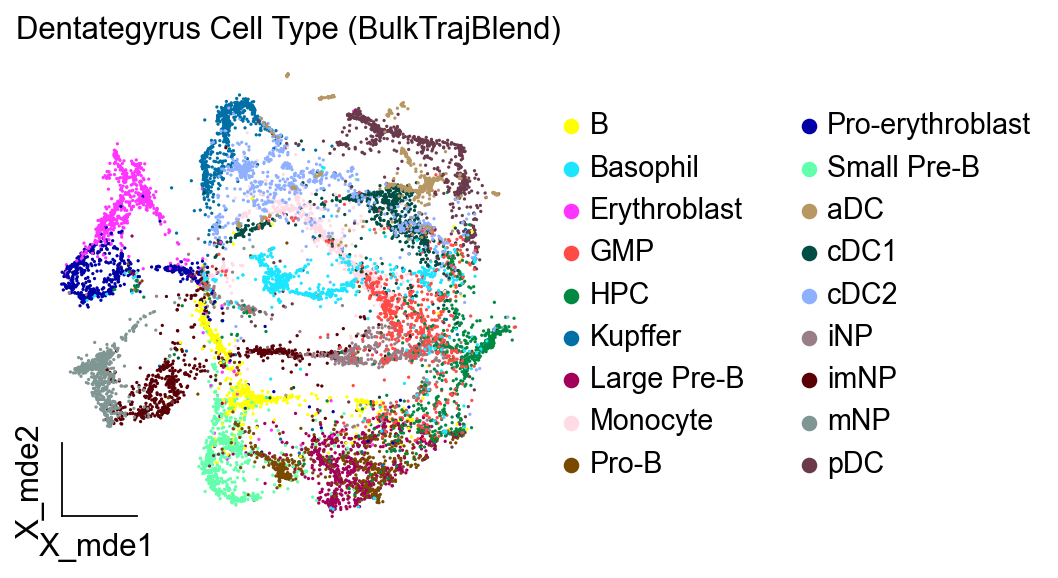

In [70]:
ov.utils.embedding(test_adata,
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

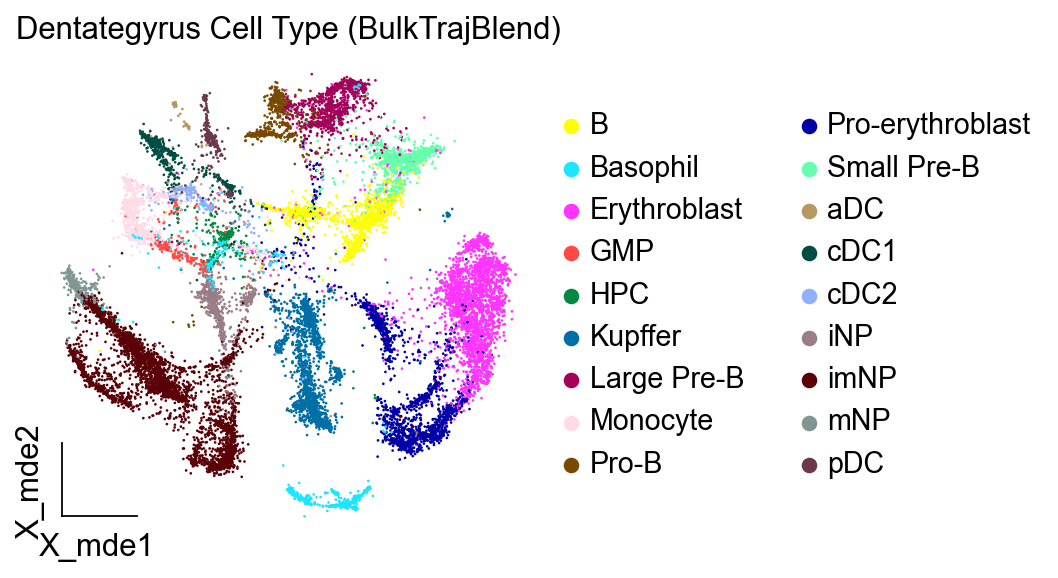

In [26]:
ov.utils.embedding(adata_dict[20000],
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=sc.pl.palettes.default_102)

In [90]:
adata_dict[5000]

AnnData object with n_obs × n_vars = 2784 × 3000
    obs: 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'celltype_colors'
    obsm: 'scaled|original|X_pca', 'X_mde'
    varm: 'scaled|original|pca_loadings'
    layers: 'scaled', 'lognorm'

In [ ]:
via_dict={}
for cell_value,k in zip([1000,2000,5000,10000,20000],[15,15,25,25,25]):
    via_dict[cell_value] = ov.single.pyVIA(adata=adata_dict[cell_value],adata_key='scaled|original|X_pca',adata_ncomps=100, basis='X_mde',
                             clusters='celltype',knn=k,random_seed=112,root_user=['HPC','GMP'],
    )
    via_dict[cell_value].run()
    via_dict[cell_value].get_pseudotime(adata_dict[cell_value])
    sc.pp.neighbors(adata_dict[cell_value],n_neighbors= 15,use_rep='scaled|original|X_pca')
    ov.utils.cal_paga(adata_dict[cell_value],use_time_prior='pt_via',vkey='paga',
                     groups='celltype')
    

In [84]:
via_dict.keys()

dict_keys([1000, 2000])

<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

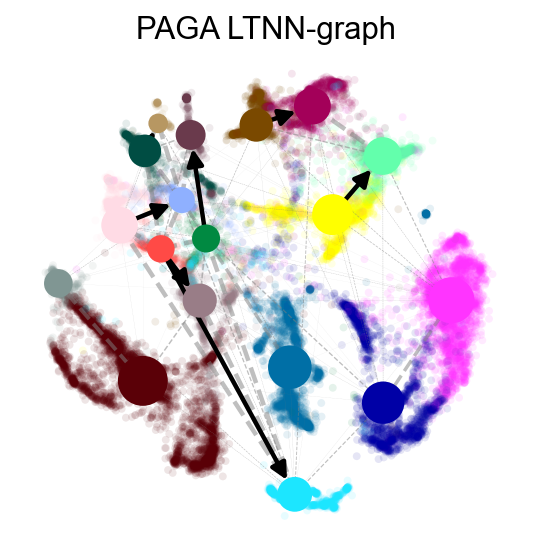

In [32]:
ov.utils.plot_paga(adata_dict[20000],basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
#plt.title('PAGA Dentategyrus (BulkTrajBlend)',fontsize=13)

<AxesSubplot: title={'center': 'Dentategyrus Cell Type (BulkTrajBlend)'}, xlabel='X_mde1', ylabel='X_mde2'>

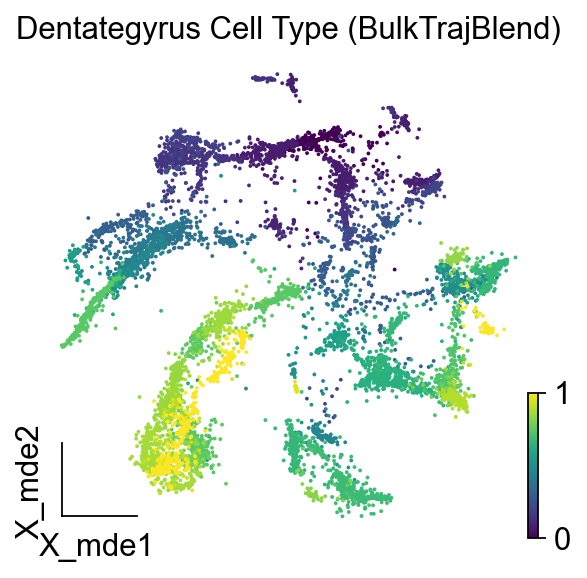

In [304]:
ov.utils.embedding(adata_dict[64],
                basis='X_mde',
           color=['pt_via'],title='Dentategyrus Cell Type (BulkTrajBlend)',
            frameon='small',show=False,
           wspace=0.4)

In [33]:
transitions_dict={}
for cell_value in [1000,2000,5000,10000,20000]:
    after_transitions=pd.DataFrame(adata_dict[cell_value].uns['paga']['transitions_confidence'].toarray(),
                index=adata_dict[cell_value].obs['celltype'].cat.categories,
                columns=adata_dict[cell_value].obs['celltype'].cat.categories)
    transitions_dict[cell_value]=after_transitions

In [36]:
res={}
for cell_value in [1000,2000,5000,10000,20000]:
    res_dict={}

    #Cor:exp
    # 计算对角线均值
    diagonal_mean = np.trace(cor_dict[cell_value].values) / len(cor_dict[cell_value])
    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cor_dict[cell_value].values) - np.trace(cor_dict[cell_value].values)) / (len(cor_dict[cell_value])**2 - len(cor_dict[cell_value]))

    res_dict['Cor_mean']=diagonal_mean
    res_dict['non_Cor_mean']=non_diagonal_mean

    #Cos:gene
    # 计算对角线均值
    diagonal_mean = np.trace(cos_dict[cell_value].values) / len(cos_dict[cell_value])

    # 计算非对角线均值
    non_diagonal_mean = (np.sum(cos_dict[cell_value].values) - np.trace(cos_dict[cell_value].values)) / (len(cos_dict[cell_value])**2 - len(cos_dict[cell_value]))

    res_dict['Cos_mean']=diagonal_mean
    res_dict['non_Cos_mean']=non_diagonal_mean

    #raw:trans
    res_dict['Trans_raw']=0
    res_dict['Trans_after']=transitions_dict[cell_value].loc['Basophil'].max()


    #Variance
    res_dict['Var_raw']=np.var(adata2.obs.loc[adata2.obs['celltype']=='Basophil','pt_via'])
    res_dict['Var_after']=np.var(adata_dict[cell_value].obs.loc[adata_dict[cell_value].obs['celltype']=='Basophil','pt_via'])
    
    res_dict['noisy']=len(noisy_dict[cell_value])
    res_dict['Inter_cells']=adata_dict[cell_value].shape[0]-cell_value
    res[cell_value]=res_dict

In [38]:
import pickle
with open('result/metric_hpc_cell.pkl','wb') as f:
    pickle.dump(res,f)

In [37]:
res

{1000: {'Cor_mean': 0.9531482341691153,
  'non_Cor_mean': 0.6246709940561689,
  'Cos_mean': 0.3629397934807578,
  'non_Cos_mean': 0.038172672890022775,
  'Trans_raw': 0,
  'Trans_after': 0.014867571159534342,
  'Var_raw': 0.0003527858476859608,
  'Var_after': 0.062044212102852436,
  'noisy': 18,
  'Inter_cells': 784},
 2000: {'Cor_mean': 0.9548325608610545,
  'non_Cor_mean': 0.5780632798403341,
  'Cos_mean': 0.42520942251044647,
  'non_Cos_mean': 0.0425246855424799,
  'Trans_raw': 0,
  'Trans_after': 0.015929689716385066,
  'Var_raw': 0.0003527858476859608,
  'Var_after': 0.06335117316871207,
  'noisy': 26,
  'Inter_cells': 784},
 5000: {'Cor_mean': 0.9837899855859406,
  'non_Cor_mean': 0.5548741533641048,
  'Cos_mean': 0.5259468409773947,
  'non_Cos_mean': 0.046352959544296066,
  'Trans_raw': 0,
  'Trans_after': 0.019735439356448312,
  'Var_raw': 0.0003527858476859608,
  'Var_after': 0.03453661306690206,
  'noisy': 41,
  'Inter_cells': 641},
 10000: {'Cor_mean': 0.9935055333653001,
  